In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from IPython.display import clear_output


In [2]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [3]:
data = np.genfromtxt('data/train.csv', delimiter=',')


In [4]:

X_train = data[1:30001,402:802].reshape((-1,20,20))
Y_train = data[1:30001,2:402]#.reshape((-1,20,20))

X_test = data[-1001:-1,402:802].reshape((-1,20,20))
Y_test = data[-1001:-1,2:402] #.reshape((-1,20,20))

In [30]:
input_img = keras.Input(shape = (20,20,1))

x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(input_img)

x = layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.AveragePooling2D((3,3), padding = 'same')(x)




x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)


x = layers.Conv2D(64, (3,3),activation = 'relu', padding = 'same')(x)
x = layers.AveragePooling2D((2,2), padding = 'same')(x)


x = layers.Conv2D(128, (3,3),activation = 'relu', padding = 'same')(x)
x = layers.AveragePooling2D((2,2), padding = 'same')(x)

x = layers.Conv2D(256, (2,2),activation = 'relu', padding = 'same')(x)







x = layers.Flatten()(x)
x = layers.Dense(768, activation = 'relu')(x)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dense(400, activation = 'relu')(x)
out = layers.Dense(400, activation = 'sigmoid')(x)



In [23]:
model = keras.Model(input_img, out)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20, 20, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 8)         80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 16)        1168      
_________________________________________________________________
average_pooling2d_6 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 64)          0   

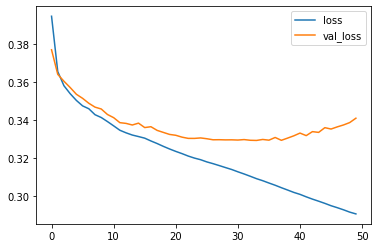

In [25]:
model.fit(X_train, Y_train,
          epochs = 50,
          batch_size = 128,
          use_multiprocessing=True,
          validation_data=(X_test, Y_test),
          callbacks = [plot_losses],verbose = 0)

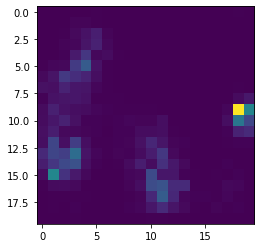

In [26]:
plt.imshow(model.predict(X_test)[20].reshape((20,20)))

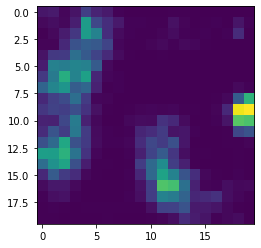

In [10]:
plt.imshow(model.predict(X_test)[20].reshape((20,20)))

(array([366.,  19.,  10.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([8.3508205e-09, 8.2068201e-03, 1.6413631e-02, 2.4620444e-02,
        3.2827254e-02, 4.1034065e-02, 4.9240876e-02, 5.7447687e-02,
        6.5654501e-02, 7.3861308e-02, 8.2068123e-02], dtype=float32),
 <BarContainer object of 10 artists>)

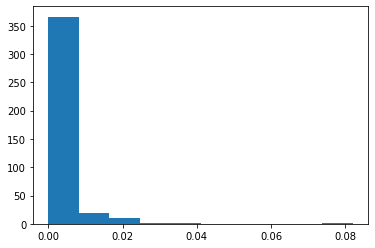

In [29]:
plt.hist(model.predict(X_test)[20])

In [12]:
idx = model.predict(X_test)[20]  < 0.3


a  = model.predict(X_test)[20]


In [13]:
for i in range(len(idx)):
    
    if idx[i]:
        a[i] = 0

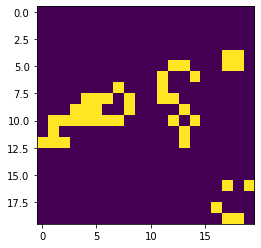

In [27]:
plt.imshow(Y_test[100].reshape((20,20)))

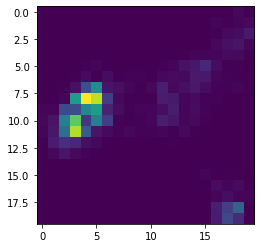

In [28]:
plt.imshow(model.predict(X_test)[100].reshape((20,20)))

In [38]:
resnet = keras.applications.ResNet50V2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape= None,
    pooling='avg',
    classes=400,
    classifier_activation='sigmoid',
)


In [ ]:
resnet